In [1]:
import os
from ipynb.fs.full.preprocessing import parse_poems, parse_lines
from HMM_soln import unsupervised_HMM

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 10, 24, 21, 25, 13, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 34, 46, 34, 47, 28, 34, 48, 46, 49, 50, 26, 6, 51, 52, 15, 53, 54, 55, 56, 57, 58, 28, 15, 59, 60, 61, 29, 30, 62, 63, 34, 64, 56, 22, 65, 66, 67, 68, 69, 70, 15, 71, 72, 73, 74, 75, 76, 28, 77, 15, 53, 78, 18, 15, 79, 56, 80], [81, 82, 83, 84, 85, 34, 86, 56, 87, 88, 89, 68, 34, 8, 90, 34, 91, 92, 93, 94, 95, 96, 52, 97, 76, 41, 98, 99, 100, 101, 102, 103, 104, 105, 106, 43, 107, 34, 108, 45, 43, 107, 15, 109, 100, 34, 110, 111, 28, 112, 61, 29, 30, 88, 113, 32, 114, 115, 116, 117, 56, 118, 119, 120, 121, 122, 119, 123, 34, 8, 124, 125, 26, 126, 127, 74, 128, 129, 100, 130, 84, 131, 132, 133, 56, 134, 132, 135, 136, 137, 21, 108, 18, 138, 29, 74, 114, 28, 76, 139, 140, 81, 26, 51, 135, 56, 141, 34, 142, 143, 81, 26, 144, 145, 146], [147, 68, 34, 148, 56, 149, 15, 150, 26, 151, 52, 152, 15, 19, 6, 150

obs_map_reverser() and sample_sentence() functions modified from Homework 6's HMM_helper.py by Andrew Kang

In [2]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence(hmm, obs_map, n_words=100):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_emission(n_words)
    sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence).capitalize()

def generate_obs(hmm, obs_map):
    '''
    Naively generates 14-line sonnet with 8 words each.
    
    Inputs:
    hmm: trained hmm
    obs_map: maps word to observation index
    
    Outputs:
    None
    '''
    # generate all words in sonnet
    all_words = sample_sentence(hmm, obs_map, 112)
    all_words = all_words.split(' ')
    
    # split into 14 lines and add capitalization/naive punctuation
    for i in range(14):
        count = 0
        line = ' '.join(all_words[i*8:(i+1)*8]).capitalize()
        if i < 11 or i == 12:
            line += ','
        else:
            line += '.'
        print(line)

def generate_by_line(hmm, obs_map):
    for i in range(14):
        line = sample_sentence(hmm, obs_map, 8)
        if i < 11 or i == 12:
            line += ','
        else:
            line += '.'
        print(line)

In [3]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
obs, obs_map = parse_lines(text)

In [4]:
hmm2 = unsupervised_HMM(obs, 2, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [5]:
hmm4 = unsupervised_HMM(obs, 4, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [6]:
hmm6 = unsupervised_HMM(obs, 6, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [7]:
hmm8 = unsupervised_HMM(obs, 8, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [34]:
hmm12 = unsupervised_HMM(obs, 12, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [9]:
# in naive implementation, simply generate 14-line sonnet without enforcing rhyme/meter, etc.
generate_obs(hmm2, obs_map)

Perfect deaths then turned then burthens heart so,
By to as i o mine the mine,
Amis straight thy you shall i me thou,
Honouring second not appetite tenants charactered thine rank,
You friend beloved for their be millioned music,
Down back new is of she vilest sin,
No should that eyes but my pine and,
Not ten one intend breathe because therefore of,
Self for better to suffer days still black,
In engrossed showers an enfeebled but limit hast,
Lives but in gentle thou that shine my,
Thou enmity growth or riper memory so bitter.
When thought earth my i when thoughts or,
With and should of of number thee graces.


In [10]:
generate_by_line(hmm2, obs_map)

Tear doth but praised a much cannot thing,
One not from by expressed wanting carcanet feeding,
My silver doth drowns thy with fair the,
Still world since thee heat earth so powerful,
Side making thou that pen many since torment,
No still duty stronger glad thy in die,
Fell days beauteous growst behold pleasures single why,
Sickly thou cause the at heart worthy thou,
Every warning thee tend that sight of adding,
So on and gifts bestow princes thee decays,
To her not the and have every the,
To like than i hearts most th fee.
Doth i but writ how grievances envy find,
Thou but impute sometime that and with laid.


In [11]:
generate_obs(hmm4, obs_map)

Kissing abundant restful behold a one any past,
May thy walls aid desired to influence sake,
Feathers only most under assure will answer no,
Purpose not lies besiege unkindness not mine is,
Might where my mine my for which a,
Sing fairer i love that seek a hairs,
Be the thy change his happier urge thy,
Why where all the say gone at a,
Did the wounded pride my all all decay,
Your ay with lived got shadows live doth,
No can which seeming by a some look,
Hours sealed but poets i own doom boat.
Before ill i with call verse my beloved,
Towards to which rich to be mine that.


In [12]:
generate_by_line(hmm4, obs_map)

Though bath grown prefiguring aprils loves i then,
Men these be come east broke is the,
That creatures latch and writ the beauty so,
Whilst were me mark abysm bold worse of,
By form never of then refigured love my,
Beauty but by say book not self that,
The will in to brood glory your to,
Read give heaven i world what my mine,
Profound so my stand back i was stamped,
Not that down matter sullen my some i,
A crawls not fair loss is gazed being,
I dreams those bloody a discloses do drained.
Wondring that as murdrous nature flattered against though,
And from raiment wherefore by distance thou potions.


In [13]:
generate_obs(hmm6, obs_map)

My great or deserts spirit than mine scythe,
Pen mine dull doth the store with is,
Issue so thy noon dost prouder scythe kissing,
Thy be black ill invention these more beauty,
Diseased which forbear thy delight of a jade,
Cannot of praise lengths the sufficed another for,
Complexion have freezings the added of the one,
My to i longer burthen your love thy,
Ye so niggard thinly fine is friends longer,
In my soul my mightier and find no,
Gross and a both becoming make now then,
The yield of heartinflaming sweet it had when.
Of help my sword by the hid be,
Him comment beauteous is own to graciously youth.


In [14]:
generate_by_line(hmm6, obs_map)

One words have boy selfdoing thy beautys how,
I their bosoms tops the thought enlighten and,
Crystal in o born me that some of,
But to not natures for bond therefore i,
Himself truth why in her decay thee that,
And thou i believe it now almost they,
Green ill describe unless thy sessions annexed my,
Scorned thy my day removed and for being,
Seldom beauty by niggarding sovereign they thee the,
Cannot shall brings their yield with vial humour,
Hymn retention thee beauty dark loves exceeds set,
Loves is blooms be glorious of my best.
Should now those breach see eternal nature in,
Inward bootless hooks in impanelled summers for thou.


In [15]:
generate_obs(hmm8, obs_map)

Walks but mutual you at art ill hours,
Tis me firm thou wilt compound wilt prove,
Lying savage i and and of the her,
Silent it so there no blot do art,
Shadow thee for my roses prove by that,
All black love state of means wealth having,
Amends happy blame mans loves who thine my,
I nor ever but deaths added and praise,
Away i example grossly thy newer as youth,
So i must in his flesh boy which,
Then brand golden say petty woe that wherefore,
Thou ye been which buds shall me outward.
Thou one gone though it of you not,
And then was new to hideous my i.


In [16]:
generate_by_line(hmm8, obs_map)

If things never that the year brass antique,
Seeming save their hush last bending good and,
Shall shun the sighs thoughts any thou my,
With ages best truth those you whose that,
Is who to held he spent and let,
As thou that desire in thy he to,
So thou i woes praise through the i,
Keep suited if bad plea back thou will,
And as unswayed my art do thee grounded,
Frank hand do herd audit time sides did,
Against show in you suffered veins comment high,
On mortal glory birth on time i held.
Repent votary this well going heart bearing tall,
And creation thoughts which yet do bear your.


In [38]:
generate_obs(hmm12, obs_map)

Or of my rage the thought form am,
A dull cannot each heaven foul do and,
Love to this thing not accusing gone whilst,
Thou the or in a graciously these mans,
Draw thine speak can excel goodness made thee,
They alien small hate no lengths my bright,
Did any day thou is be will of,
Second that he breathers the thy sour thou,
Eyes her eyelids confound advocate this to in,
Thy my my possessing with as thorns sweets,
So groan tongue with that in thy determinate,
May nature wouldst blamed by cease hath morrow.
Use to many did sweet my and doth,
Closet know thee of subdued sweet lie like.


In [39]:
generate_by_line(hmm12, obs_map)

Urge is two night mad downrased her robbery,
Next dial fortune posterity unfathered of self let,
Your the and call possession with thee thy,
As very thief niggarding flattery that in to,
Folly you whereon knights sharp in hand like,
You dedicated so nor where i be a,
O attending altered pricked them bud your require,
Substance yet do checked of the as the,
Dost gently despise him as to of me,
Thou of my thus from my and for,
Thou stealing shall he the be loves decayed,
Sometime this of your sweet praise thou me.
Live hide and to do weary lovst not,
Canker thy pen that acquaintance should than age.


In [19]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# do some basic visualizations 
wordcloud = WordCloud(max_words=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words in Shakespearean Sonnets', fontsize=12)
plt.savefig('figures/sonnet_wordcloud.png')

In [20]:
from HMM_helper import (
    states_to_wordclouds,
    animate_emission
)

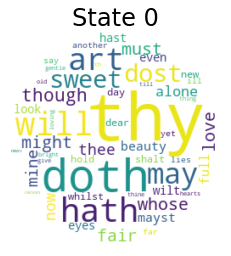

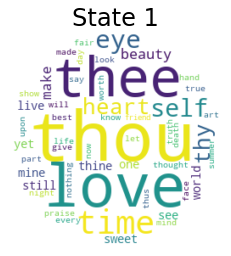

In [21]:
wordclouds = states_to_wordclouds(hmm2, obs_map)

In [22]:
for i in range(len(wordclouds)):
    print("State " + str(i))
    words = wordclouds[i].words_.keys()
    words = list(words)
    print(words[:10])

State 0
['thy', 'doth', 'hath', 'will', 'art', 'may', 'sweet', 'dost', 'though', 'love']
State 1
['thou', 'love', 'thee', 'time', 'eye', 'self', 'thy', 'heart', 'beauty', 'make']


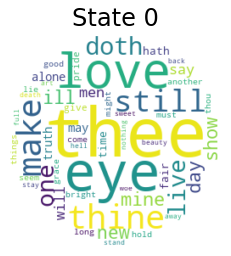

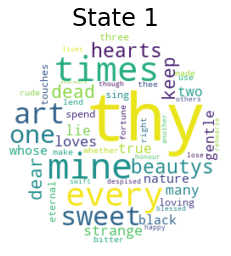

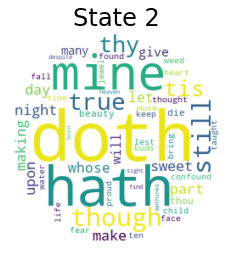

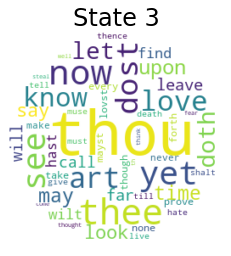

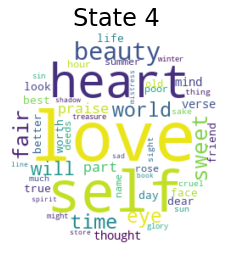

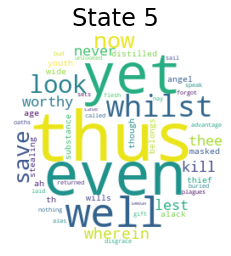

In [23]:
wordclouds = states_to_wordclouds(hmm6, obs_map)

In [24]:
for i in range(len(wordclouds)):
    print("State " + str(i))
    words = wordclouds[i].words_.keys()
    words = list(words)
    print(words[:10])

State 0
['thee', 'eye', 'love', 'thine', 'make', 'still', 'doth', 'live', 'one', 'mine']
State 1
['thy', 'mine', 'times', 'every', 'art', 'sweet', 'one', 'beautys', 'hearts', 'keep']
State 2
['doth', 'hath', 'mine', 'though', 'still', 'true', 'thy', 'tis', 'night', 'part']
State 3
['thou', 'thee', 'now', 'yet', 'see', 'dost', 'art', 'love', 'know', 'doth']
State 4
['love', 'self', 'heart', 'beauty', 'sweet', 'fair', 'time', 'world', 'eye', 'will']
State 5
['thus', 'even', 'yet', 'well', 'whilst', 'look', 'now', 'save', 'wherein', 'worthy']


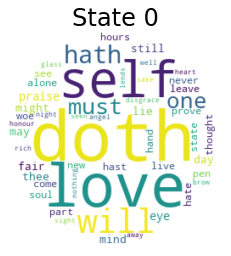

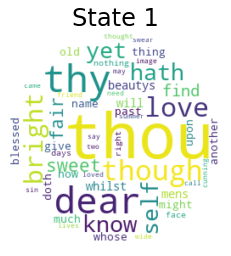

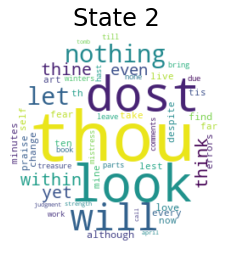

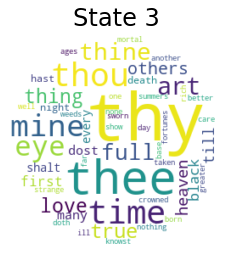

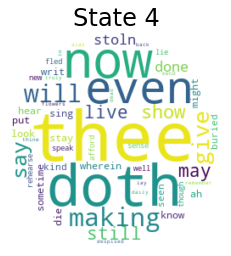

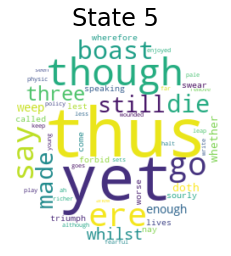

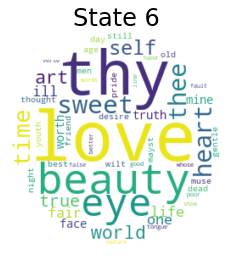

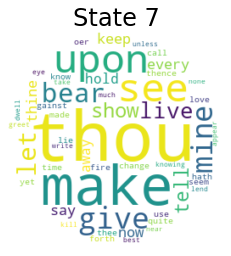

In [25]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

In [26]:
for i in range(len(wordclouds)):
    print("State " + str(i))
    words = wordclouds[i].words_.keys()
    words = list(words)
    print(words[:10])

State 0
['doth', 'love', 'self', 'will', 'hath', 'must', 'one', 'praise', 'eye', 'day']
State 1
['thou', 'thy', 'dear', 'though', 'love', 'bright', 'hath', 'yet', 'self', 'know']
State 2
['thou', 'look', 'dost', 'will', 'nothing', 'let', 'within', 'yet', 'thine', 'think']
State 3
['thy', 'thee', 'time', 'thou', 'mine', 'eye', 'art', 'thine', 'full', 'true']
State 4
['thee', 'doth', 'now', 'even', 'making', 'will', 'give', 'say', 'show', 'still']
State 5
['thus', 'yet', 'though', 'ere', 'go', 'say', 'boast', 'die', 'made', 'still']
State 6
['love', 'thy', 'beauty', 'eye', 'sweet', 'heart', 'thee', 'time', 'self', 'art']
State 7
['thou', 'make', 'upon', 'see', 'give', 'mine', 'bear', 'let', 'live', 'show']


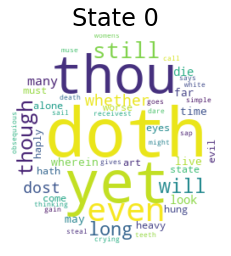

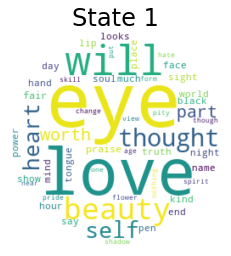

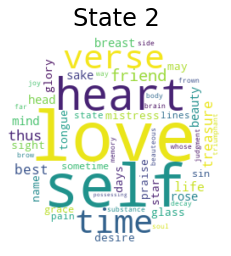

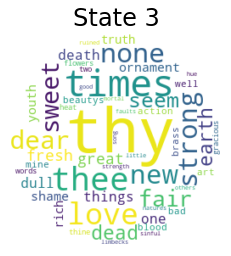

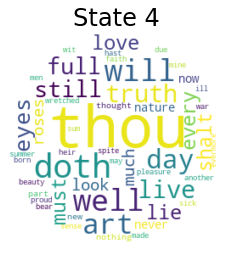

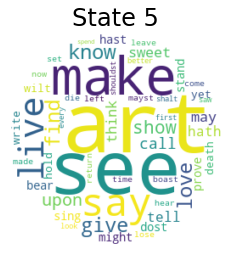

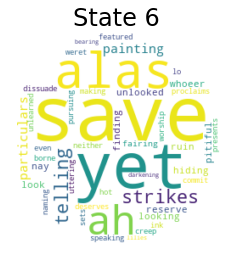

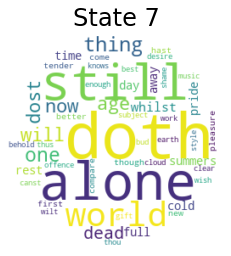

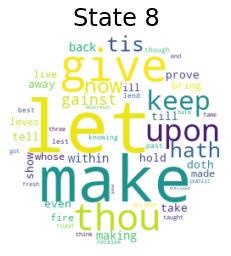

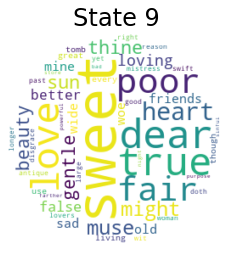

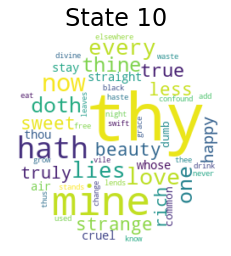

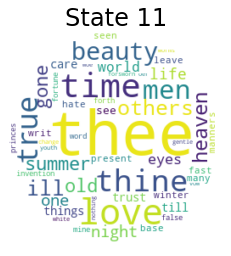

In [35]:
wordclouds = states_to_wordclouds(hmm12, obs_map)

In [36]:
for i in range(len(wordclouds)):
    print("State " + str(i))
    words = wordclouds[i].words_.keys()
    words = list(words)
    print(words[:10])

State 0
['doth', 'yet', 'thou', 'even', 'still', 'though', 'will', 'long', 'whether', 'dost']
State 1
['eye', 'love', 'will', 'beauty', 'thought', 'self', 'heart', 'worth', 'part', 'praise']
State 2
['love', 'self', 'heart', 'verse', 'time', 'friend', 'thus', 'treasure', 'best', 'life']
State 3
['thy', 'times', 'thee', 'love', 'none', 'new', 'strong', 'dear', 'sweet', 'fair']
State 4
['thou', 'doth', 'well', 'will', 'art', 'day', 'truth', 'live', 'full', 'still']
State 5
['art', 'see', 'make', 'say', 'live', 'give', 'know', 'find', 'love', 'show']
State 6
['save', 'yet', 'alas', 'ah', 'strikes', 'telling', 'painting', 'particulars', 'reserve', 'hiding']
State 7
['doth', 'alone', 'still', 'world', 'thing', 'one', 'now', 'will', 'dost', 'age']
State 8
['let', 'make', 'give', 'thou', 'upon', 'keep', 'hath', 'now', 'tis', 'gainst']
State 9
['sweet', 'dear', 'true', 'love', 'poor', 'fair', 'heart', 'might', 'muse', 'sun']
State 10
['thy', 'mine', 'hath', 'now', 'love', 'every', 'lies', 'dot


Animating...


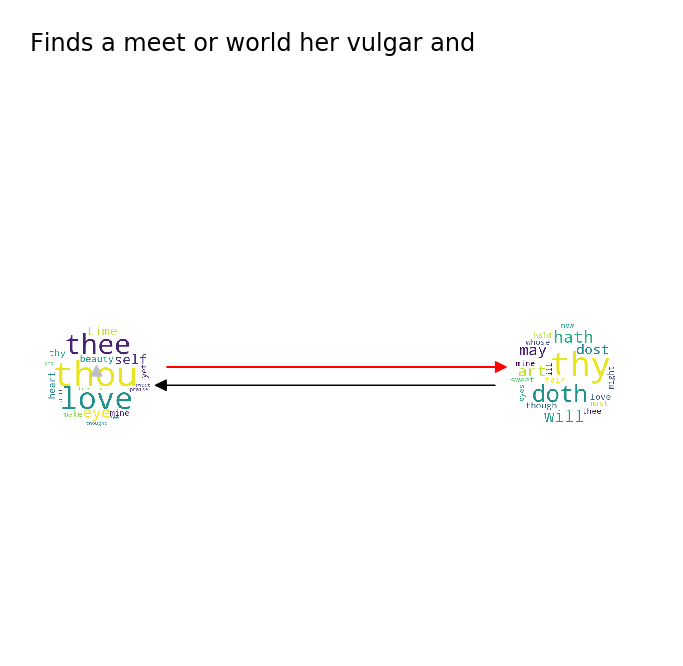

In [29]:
from IPython.display import HTML

anim = animate_emission(hmm2, obs_map, M=8)
HTML(anim.to_html5_video())


Animating...


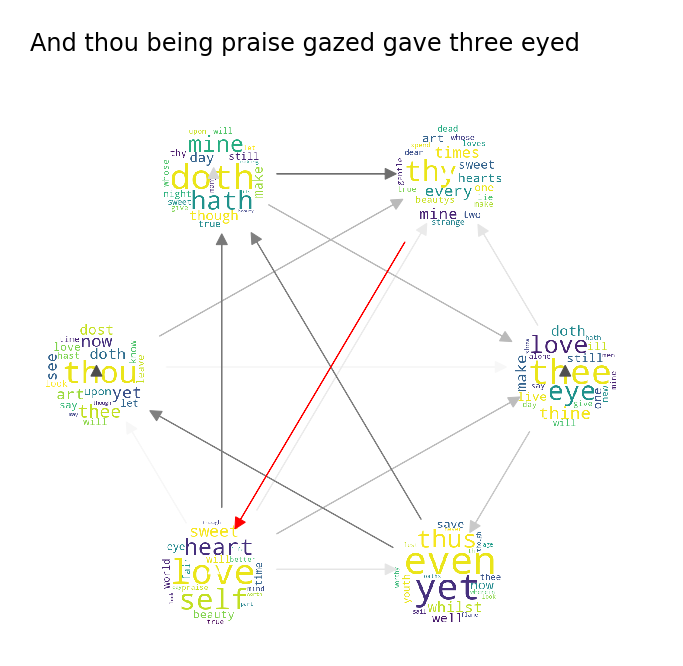

In [30]:
from IPython.display import HTML

anim = animate_emission(hmm6, obs_map, M=8)
HTML(anim.to_html5_video())


Animating...


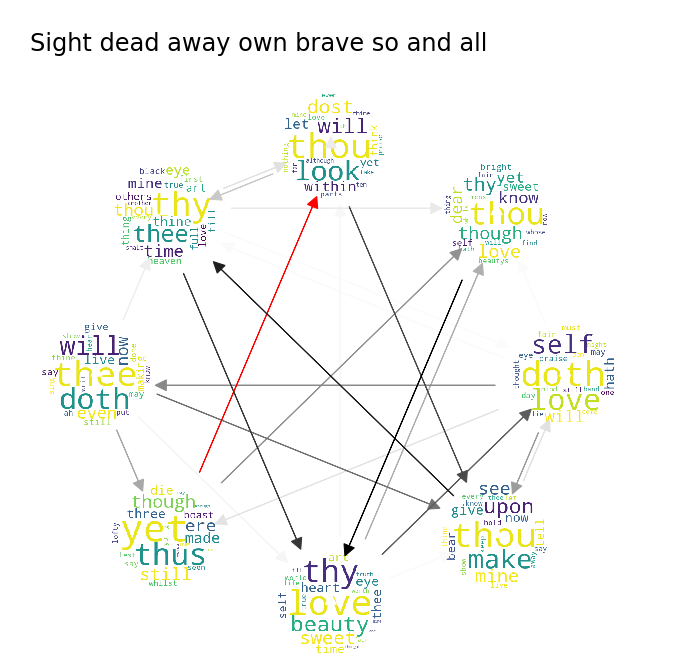

In [31]:
from IPython.display import HTML

anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())


Animating...


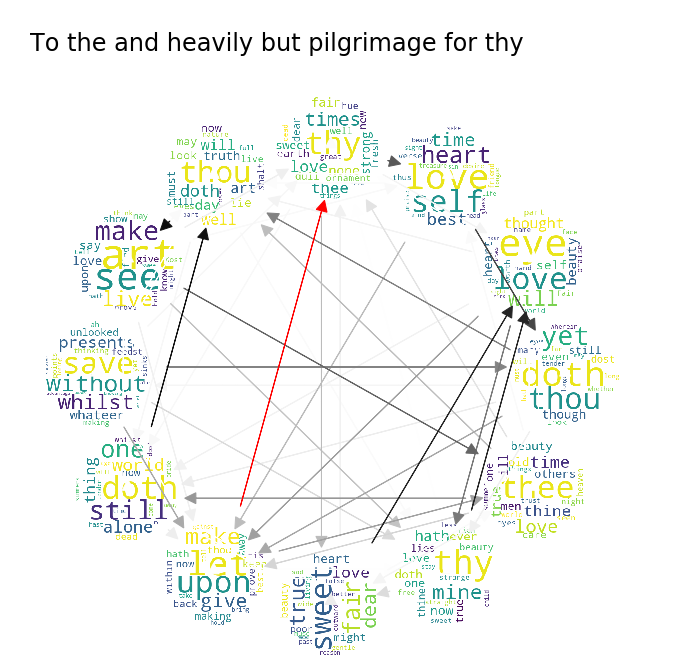

In [37]:
from IPython.display import HTML

anim = animate_emission(hmm12, obs_map, M=8)
HTML(anim.to_html5_video())